In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('results.csv', na_values='\\N')

Question 1

In [247]:
df['position'] = pd.to_numeric(df['position'], errors='coerce')
top_5 = df.query('position <= 5')
top_5

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25820,25826,1096,830,9,1.0,1,1.0,1,1,25.0,58,1:27:45.914,5265914.0,54.0,6.0,1:29.392,212.676,1
25821,25827,1096,844,6,16.0,3,2.0,2,2,18.0,58,+8.771,5274685.0,48.0,10.0,1:29.719,211.901,1
25822,25828,1096,815,9,11.0,2,3.0,3,3,15.0,58,+10.093,5276007.0,52.0,4.0,1:28.972,213.680,1
25823,25829,1096,832,6,55.0,4,4.0,4,4,12.0,58,+24.892,5290806.0,50.0,3.0,1:28.879,213.904,1


Question 2

In [248]:
df['time']= pd.to_timedelta(df['time'], errors='coerce')
df['time'] = df['time'].fillna(df['time'].median())
df['time']

0       0 days 01:34:50.616000
1       0 days 01:38:30.175000
2       0 days 01:38:30.175000
3       0 days 01:38:30.175000
4       0 days 01:38:30.175000
                 ...          
25835   0 days 01:38:30.175000
25836   0 days 01:38:30.175000
25837   0 days 01:38:30.175000
25838   0 days 01:38:30.175000
25839   0 days 01:38:30.175000
Name: time, Length: 25840, dtype: timedelta64[ns]

Question 3

In [249]:
grouped = df.groupby(by='driverId')['points']
total_points = grouped.agg(TotalPoints='sum')
total_points =total_points.reset_index()
total_points

,driverId,TotalPoints
0,1,4396.5
1,2,259.0
2,3,1594.5
3,4,2061.0
4,5,105.0
...,...,...
850,852,44.0
851,853,0.0
852,854,12.0
853,855,6.0


Question 4

In [250]:
grouped_constructor = df.query('position==1').groupby(by= 'constructorId')['position']
total_wins_constructor = grouped_constructor.agg(TotalWins= 'count')
total_wins_constructor = total_wins_constructor.sort_values(by='TotalWins', ascending= False)
total_wins_constructor =total_wins_constructor.reset_index()
total_wins_constructor.head(1)

,constructorId,TotalWins
0,6,243


Question 5

In [251]:
df['fastestLapSpeed'] = pd.to_numeric(df['fastestLapSpeed'], errors='coerce')
average_lapspeed = df.groupby(by='raceId')['fastestLapSpeed'].agg(AverageFastestLapSpeed= 'mean').reset_index()
average_lapspeed

,raceId,AverageFastestLapSpeed
0,1,214.918895
1,2,202.320556
2,3,171.060450
3,4,204.150650
4,5,199.641562
...,...,...
1074,1092,196.660722
1075,1093,195.484737
1076,1094,187.508450
1077,1095,207.119389


Question 6

In [252]:
avg_position = df.groupby(by='driverId')['positionOrder'].agg(AveragePosition='mean').reset_index()
avg_position.nsmallest(3, "AveragePosition")

,driverId,AveragePosition
590,591,2.0
801,802,2.0
765,766,3.5


Question 7

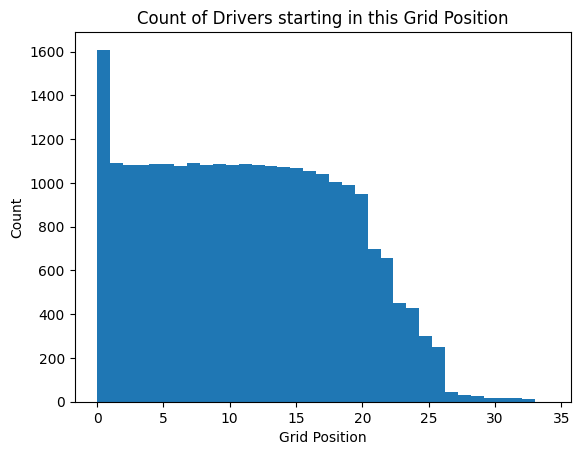

In [253]:
plt.hist(x= df['grid'], bins=df['grid'].nunique())
plt.ylabel('Count')
plt.xlabel("Grid Position")
plt.title("Count of Drivers starting in this Grid Position")
plt.show()

Question 8

In [254]:
drivers_consistent = df[['driverId','statusId']].groupby('driverId').filter(lambda x: (x['statusId'] == 1).all())
drivers_consistent['driverId']

18120    515
18326    557
18543    591
19239    674
19671    727
20150    802
24935    851
25708    856
Name: driverId, dtype: int64

Question 9

In [255]:
df['fastestLapTime']= pd.to_timedelta(df['fastestLapTime'], errors='coerce')
drivers_fastestlap = df[df['fastestLapTime'].notna()] 
drivers_fastestlap = df.groupby(by= 'driverId')['fastestLapTime'].agg(FastestLapTime= 'min').reset_index()
drivers_fastestlap

,driverId,FastestLapTime
0,1,NaT
1,2,NaT
2,3,NaT
3,4,NaT
4,5,NaT
...,...,...
850,852,NaT
851,853,NaT
852,854,NaT
853,855,NaT


Question 10

In [256]:
corr_gridpos = df[['grid','position']].corr()
corr_gridpos

,grid,position
grid,1.000000,0.643295
position,0.643295,1.000000


Our correlation between grid position and final position is 0.643, which shows there is a moderate positive correlation between grid position and final position. As the grid position number increases (starting from farther away), the driver gets a worse final position, and as the grid position number decreases (starting from closer to the start) the driver gets a better final position.